In [1]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [3]:
# Loading the Dataset
data = pd.read_csv('Tinder Reviews Sentiment Analysis.csv')

In [5]:
# Analyse Top 5 rows of the Dataset
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81a9b3f9-cdbb-4606-8a4f-6300bda776d6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Horrible,1,0,NaN,2025-03-14 00:07:00,NaN,NaN,NaN
1,ee9c61e5-af7a-476c-85f0-eaaa5a35754e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,thik one good bt free for me please,5,0,16.3.1,2025-03-13 23:40:20,NaN,NaN,16.3.1
2,1e72698f-1741-4201-a159-3e8686d1e4c2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I find somebody that I like, I I write my mess...",1,0,16.3.1,2025-03-13 23:39:12,NaN,NaN,16.3.1
3,5ca387e2-c43b-4e47-8c81-3eeb692b1c6f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,So stupid at this point. Unusable. Got reporte...,1,0,NaN,2025-03-13 23:26:04,NaN,NaN,NaN
4,584bd46a-c690-4989-8882-c4ba7a41708e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,plenty of scammers and gold diggers. dont avai...,1,1,12.3.0,2025-03-13 23:21:24,Thank you for your positive feedback! We're th...,2024-03-18 07:14:50,12.3.0


In [7]:
data = data[["content"]]

In [9]:
# Now let’s see if we have null values in the content column
data.isnull().sum()

content    1360
dtype: int64

In [11]:
# The content column also contains null values, let’s remove the null values and move on
data = data.dropna()

In [13]:
# Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

<>:8: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\w'
C:\Users\irt\AppData\Local\Temp\ipykernel_27048\1126453219.py:8: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\irt\AppData\Local\Temp\ipykernel_27048\1126453219.py:9: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\irt\AppData\Local\Temp\ipykernel_27048\1126453219.py:13: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


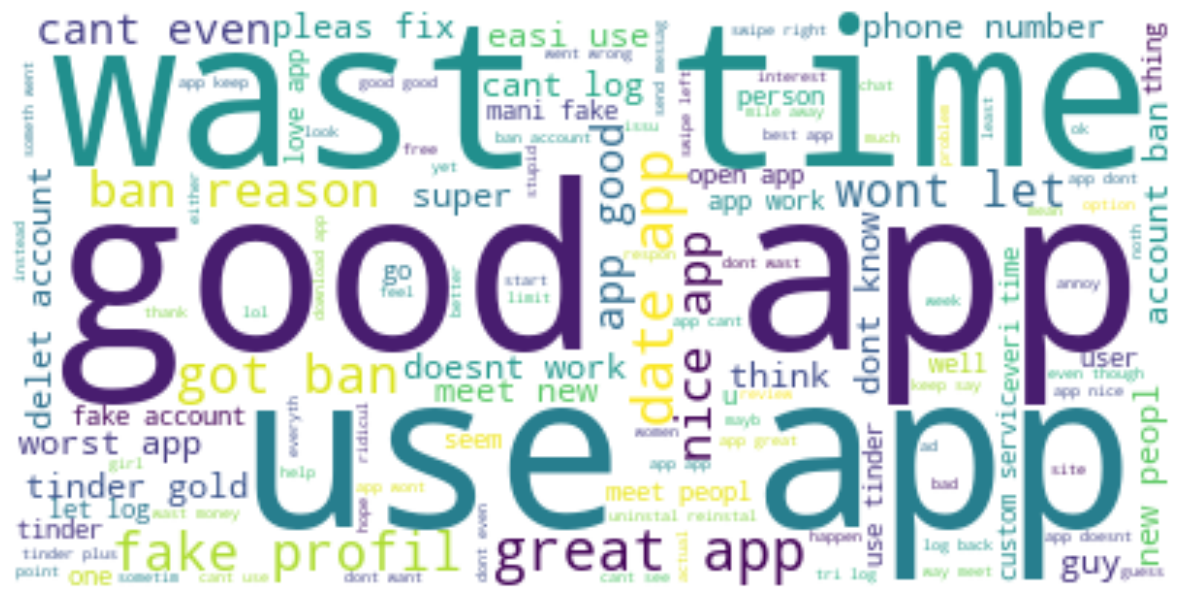

In [17]:
# Now let’s have a look at the kind of words people use in the reviews of Tinder
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
# Now let's will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\irt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                            horribl     0.000     0.000   
1                        thik one good bt free pleas     0.608     0.000   
2  find somebodi like write messag push send take...     0.187     0.054   
3  stupid point unus got report  minut use verifi...     0.000     0.412   
4  plenti scammer gold digger dont avail upgrad l...     0.000     0.140   

   Neutral  
0    1.000  
1    0.392  
2    0.759  
3    0.588  
4    0.860  


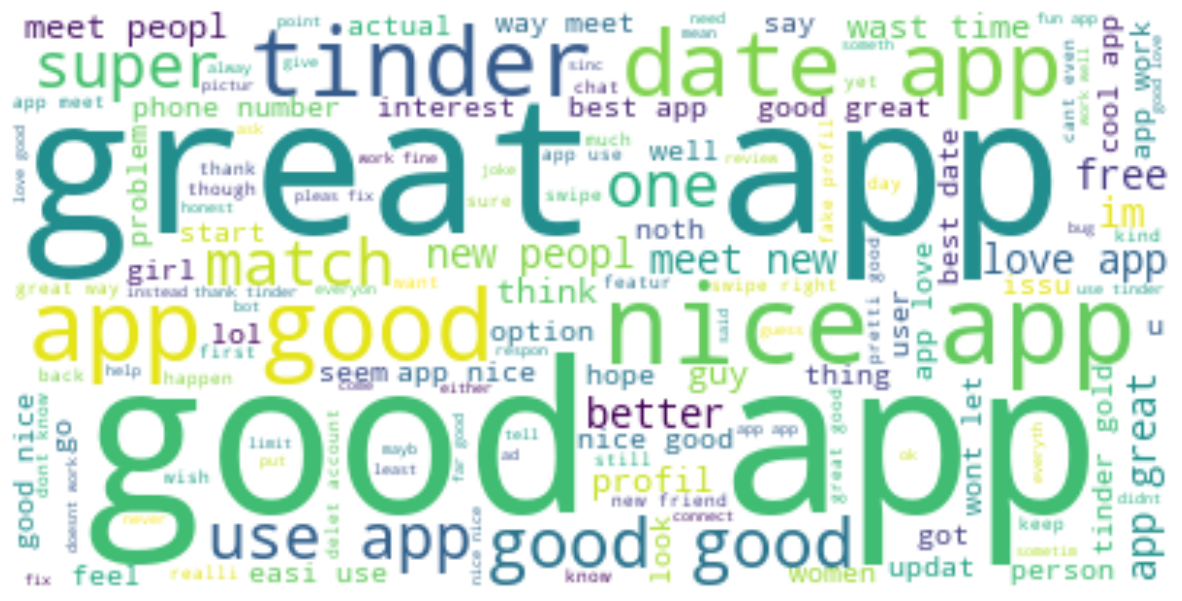

In [19]:
# Now let’s have a look at the kind of words people use in the positive reviews of Tinder
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

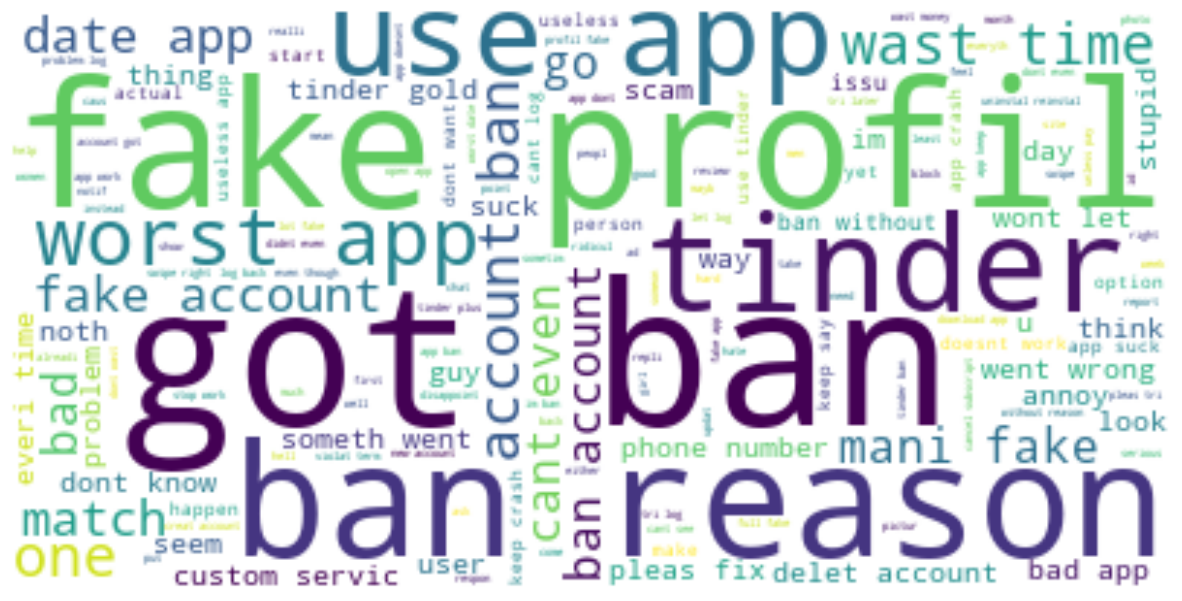

In [20]:
# Now let’s have a look at the kind of words people use in the negative reviews of Tinder
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# Let’s have a look at the overall sentiment score of the users of Tinder
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [22]:
# So most of the users write reviews neutrally. Let’s have a look at the total of all the sentiment scores
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  187890.785
Negative:  76185.815
Neutral:  375996.386


#### Summary

Tinder is one of the most popular dating applications. It connects people having similar interests.